<a href="https://colab.research.google.com/github/rs25-code/scRNA/blob/main/scRNA_SCPCA_HGG_Integrated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=849abc986f30e5aee4f1ad92b82e50f4a4abdff38a849d978201b02bda8a7ed7
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=2e9ae21fbd66c61dc7d066a76689c0042973628387ce273ba54d27697f22f4c2
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9b

In [ ]:
!pip install scikit-misc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 32.9 MB/s eta 0:00:00


In [ ]:
import csv
import gzip
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
import anndata as ad

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def pp(dir_path, sample, grade):
    print("Processing " + dir_path)
    adata = sc.read_10x_mtx(path=dir_path, var_names='gene_ids', cache=True)
    adata.obs['Sample'] = grade + sample
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    sc.pp.filter_genes(adata, min_cells=3)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]

    return adata

In [ ]:
# Already done, need to run once to generate the integrated file
out = []
for dir in os.listdir('/content/drive/MyDrive/Transcriptomics/SCPC-1/'):
    out.append(pp('/content/drive/MyDrive/Transcriptomics/SCPC-1/' + dir, dir, 'HGG-'))

Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000021
Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000002
Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000004
Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000005
Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000020
Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000001
Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000023
Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000017
Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000022
Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000003
Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000019
Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000013
Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000014
Processing /content/drive/MyDrive/Transcriptomics/SCPC-1/SCPCL000009
Processing /content/drive/MyDrive/

In [ ]:
adata = sc.concat(out)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
adata.obs_names_make_unique()

In [ ]:
adata

AnnData object with n_obs × n_vars = 26690 × 4795
    obs: 'Sample', 'n_genes_by_counts', 'total_counts'

In [ ]:
adata.obs

,Sample,n_genes_by_counts,total_counts
AGACACTAGTCCCAAT,HGG-SCPCL000021,6521,36026.003906
CAATACGTCATTCCTA,HGG-SCPCL000021,6628,34053.011719
AAGTTCGGTATTGGCT,HGG-SCPCL000021,6680,37583.976562
TCACTATTCGCTGACG,HGG-SCPCL000021,6147,34038.988281
ACCACAACAGGCGAAT,HGG-SCPCL000021,6521,36719.011719
...,...,...,...
GTGAGTTTCACTTTGT,HGG-SCPCL000008,1054,1519.000366
GATCACAAGAAGTCAT,HGG-SCPCL000008,1028,1474.000244
TAATTCCGTTCTCTCG,HGG-SCPCL000008,899,1201.000000
CGAAGGAAGTAGAGTT,HGG-SCPCL000008,964,1457.000244


In [ ]:
# adata = sc.read_h5ad('/content/drive/MyDrive/Transcriptomics/SCPC/hgg-combined.h5ad')

adata.write_h5ad('/content/drive/MyDrive/Transcriptomics/SCPC/hgg-combined.h5ad')

In [ ]:
adata.shape

(26690, 4795)

In [ ]:
adata.X

<26690x4795 sparse matrix of type '<class 'numpy.float32'>'
	with 43351523 stored elements in Compressed Sparse Row format>

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [ ]:
adata.X

<26690x4795 sparse matrix of type '<class 'numpy.float32'>'
	with 43351523 stored elements in Compressed Sparse Row format>

# Preprocessing

In [ ]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [ ]:
adata.var.sort_values('n_cells_by_counts')

,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
ENSG00000119699,473,0.013426,98.227801,358.330994
ENSG00000165912,651,0.018827,97.560884,502.498871
ENSG00000172005,728,0.029758,97.272387,794.242798
ENSG00000146122,744,0.028203,97.212439,752.738953
ENSG00000012171,898,0.026059,96.635444,695.515320
...,...,...,...,...
ENSG00000198899,26205,4.903065,1.817160,130863.320312
ENSG00000211459,26222,4.786008,1.753466,127738.617188
ENSG00000198938,26236,5.044686,1.701012,134643.281250
ENSG00000280441,26458,4.283576,0.869239,114328.796875


In [ ]:
#sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_genes(adata, min_cells=1000)

In [ ]:
adata.var.sort_values('n_cells_by_counts')

,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
ENSG00000182700,1013,0.029257,96.204571,780.865417,1013
ENSG00000163412,1043,0.027053,96.092169,722.043091,1043
ENSG00000129538,1109,0.082954,95.844886,2214.037354,1109
ENSG00000124374,1134,0.032730,95.751218,873.566589,1134
ENSG00000198933,1165,0.029565,95.635069,789.098816,1165
...,...,...,...,...,...
ENSG00000198899,26205,4.903065,1.817160,130863.320312,26205
ENSG00000211459,26222,4.786008,1.753466,127738.617188,26222
ENSG00000198938,26236,5.044686,1.701012,134643.281250,26236
ENSG00000280441,26458,4.283576,0.869239,114328.796875,26458


In [ ]:
adata.obs.sort_values('n_genes_by_counts')

,Sample,n_genes_by_counts,total_counts
AAGCGTTTCAAGCCTA,HGG-SCPCL000005,110,417.271240
TGTAACGCATGGGTCC,HGG-SCPCL000005,124,468.317932
TCTTGCGCAACGTATC,HGG-SCPCL000011,125,412.878143
GTTGTGATCCGCAAAT,HGG-SCPCL000004,128,473.456970
TAGACTGTCATCCCGT,HGG-SCPCL000004,135,462.523224
...,...,...,...
TGCGATAGTACCGTGC,HGG-SCPCL000019,4406,3536.181641
TTCCTTCAGAGTGACC,HGG-SCPCL000015,4419,3437.116211
TCACTCGCACGCGCAT,HGG-SCPCL000015,4421,3503.841309
TCCACCATCACGGGCT,HGG-SCPCL000015,4421,3524.753662


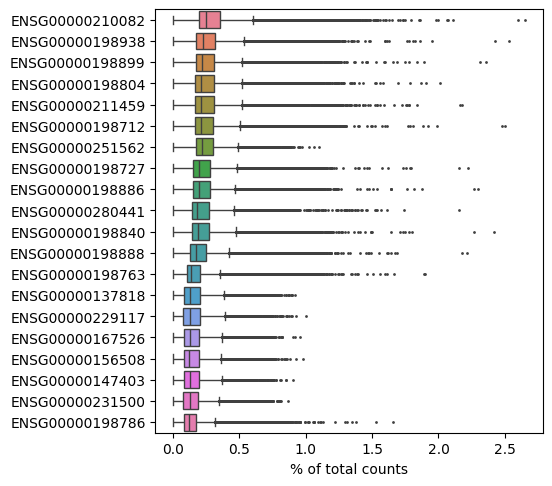

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20)

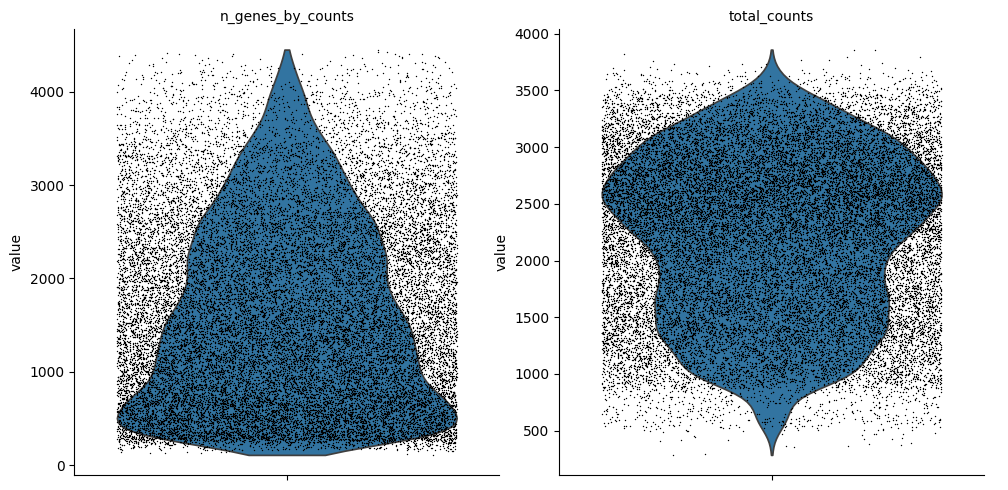

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

In [ ]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)

In [ ]:
upper_lim

3807.0

In [ ]:
adata = adata[adata.obs.n_genes_by_counts < upper_lim]

In [ ]:
adata

View of AnnData object with n_obs × n_vars = 26155 × 4787
    obs: 'Sample', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'log1p'

In [ ]:
adata.obs

,Sample,n_genes_by_counts,total_counts
AGACACTAGTCCCAAT,HGG-SCPCL000021,2964,2908.542236
CAATACGTCATTCCTA,HGG-SCPCL000021,3058,3156.907227
AAGTTCGGTATTGGCT,HGG-SCPCL000021,3076,3055.945068
TCACTATTCGCTGACG,HGG-SCPCL000021,2861,2861.083252
ACCACAACAGGCGAAT,HGG-SCPCL000021,2989,2938.061768
...,...,...,...
GTGAGTTTCACTTTGT,HGG-SCPCL000008,645,1606.179199
GATCACAAGAAGTCAT,HGG-SCPCL000008,625,1540.534668
TAATTCCGTTCTCTCG,HGG-SCPCL000008,525,1425.639771
CGAAGGAAGTAGAGTT,HGG-SCPCL000008,576,1468.165283


# Normalization





In [ ]:
adata.X.sum(axis = 1)

matrix([[2908.1968],
        [3156.9072],
        [3055.945 ],
        ...,
        [1425.6398],
        [1468.1653],
        [1664.4888]], dtype=float32)

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
adata.X.sum(axis = 1)

matrix([[10000.001],
        [10000.   ],
        [10000.   ],
        ...,
        [ 9999.999],
        [10000.   ],
        [10000.   ]], dtype=float32)

In [ ]:
sc.pp.log1p(adata) #change to log counts

In [ ]:
adata.X.sum(axis = 1)

matrix([[3959.955 ],
        [4098.6987],
        [4057.9912],
        ...,
        [1561.6876],
        [1664.7755],
        [1871.5745]], dtype=float32)

In [ ]:
adata.raw = adata

# Clustering

In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [ ]:
adata.var

,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm
ENSG00000248527,12367,0.578669,53.664294,15444.686523,12367,True,1281.0,0.819825,0.985546,1.032982
ENSG00000187608,6969,0.350441,73.889097,9353.263672,6969,True,232.0,0.455926,0.715528,1.190730
ENSG00000069424,4112,0.167944,84.593481,4482.439453,4112,True,407.0,0.243770,0.389857,1.134527
ENSG00000049245,4245,0.135999,84.095167,3629.810791,4245,True,1354.0,0.216765,0.317269,1.028257
ENSG00000116288,14693,0.875134,44.949419,23357.326172,14693,True,1879.0,1.081596,1.159802,1.005661
...,...,...,...,...,...,...,...,...,...,...
ENSG00000067829,6711,0.236953,74.855751,6324.277832,6711,True,1654.0,0.361513,0.494690,1.013502
ENSG00000196924,5985,0.239750,77.575871,6398.938965,5985,True,666.0,0.343837,0.507125,1.087725
ENSG00000185973,6834,0.255372,74.394904,6815.875488,6834,True,1998.0,0.377492,0.508028,1.001883
ENSG00000228253,4820,0.162276,81.940802,4331.131836,4820,True,392.0,0.267441,0.424282,1.138189


In [ ]:
# Get the variable names
var_names = adata.var_names.tolist()

# Create a Pandas DataFrame from the AnnData object
df = pd.DataFrame(adata.var, columns=var_names)

# Write the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Transcriptomics/SCPC/analysis_adata_var.csv', index=False)

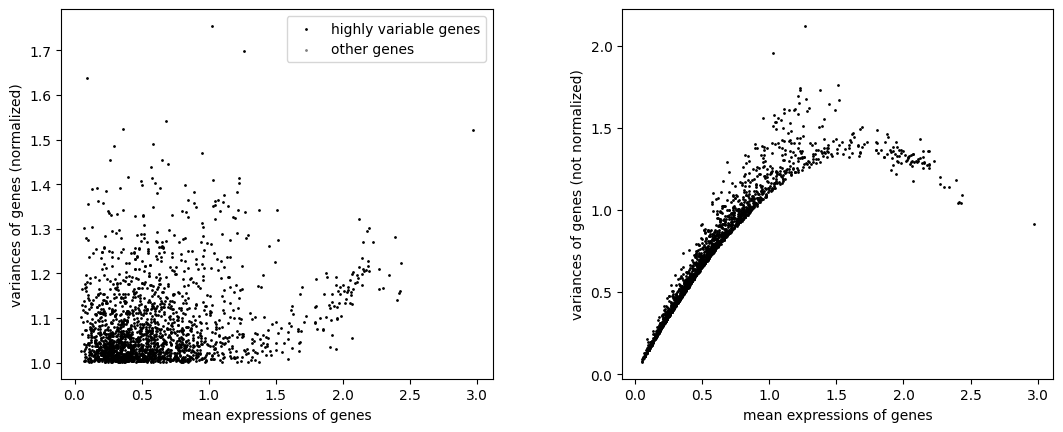

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
sc.pp.regress_out(adata, ['total_counts'])

In [ ]:
sc.pp.scale(adata, max_value=10)

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

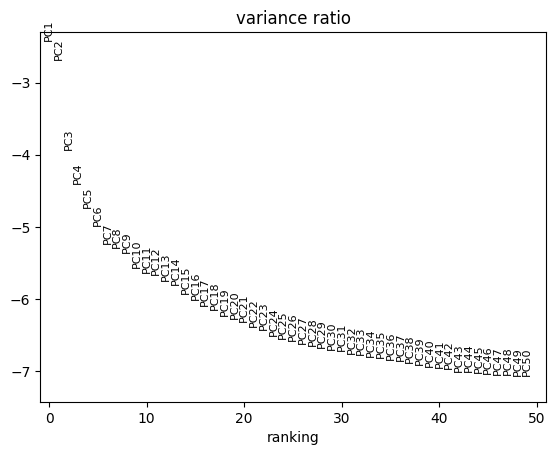

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [ ]:
sc.pp.neighbors(adata, n_pcs = 30)

In [ ]:
sc.tl.umap(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


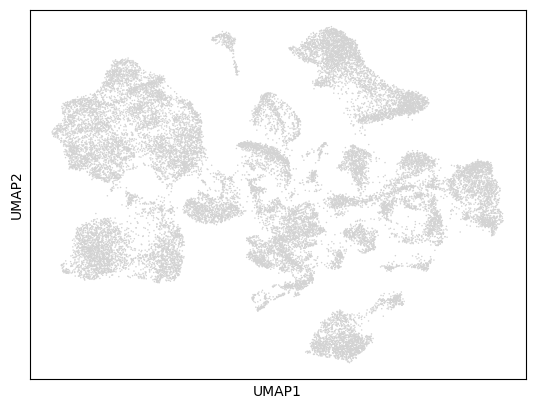

In [ ]:
sc.pl.umap(adata)

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.1 MB/s eta 0:00:00


In [ ]:
sc.tl.leiden(adata, resolution = 0.5)

In [ ]:
adata.obs

,Sample,n_genes_by_counts,total_counts,leiden
AGACACTAGTCCCAAT,HGG-SCPCL000021,2964,2908.542236,10
CAATACGTCATTCCTA,HGG-SCPCL000021,3058,3156.907227,7
AAGTTCGGTATTGGCT,HGG-SCPCL000021,3076,3055.945068,7
TCACTATTCGCTGACG,HGG-SCPCL000021,2861,2861.083252,7
ACCACAACAGGCGAAT,HGG-SCPCL000021,2989,2938.061768,10
...,...,...,...,...
GTGAGTTTCACTTTGT,HGG-SCPCL000008,645,1606.179199,8
GATCACAAGAAGTCAT,HGG-SCPCL000008,625,1540.534668,8
TAATTCCGTTCTCTCG,HGG-SCPCL000008,525,1425.639771,8
CGAAGGAAGTAGAGTT,HGG-SCPCL000008,576,1468.165283,8


In [ ]:
sorted_by_num_cells = adata.var['n_cells_by_counts'].sort_values(ascending=False)
sorted_by_num_cells

ENSG00000251562    24636
ENSG00000167526    23668
ENSG00000156508    23649
ENSG00000147403    23644
ENSG00000137818    23600
                   ...  
ENSG00000108387     1213
ENSG00000124374     1134
ENSG00000129538     1109
ENSG00000163412     1043
ENSG00000182700     1013
Name: n_cells_by_counts, Length: 2000, dtype: int64

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


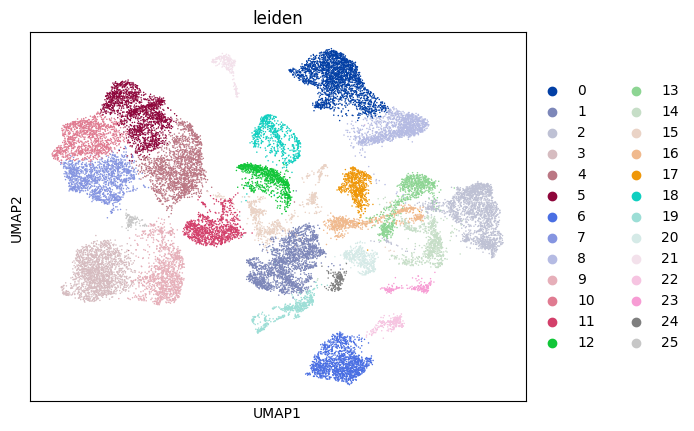

In [ ]:
sc.pl.umap(adata, color=['leiden'])

In [ ]:
sc.tl.rank_genes_groups(adata, "leiden", method="t-test")

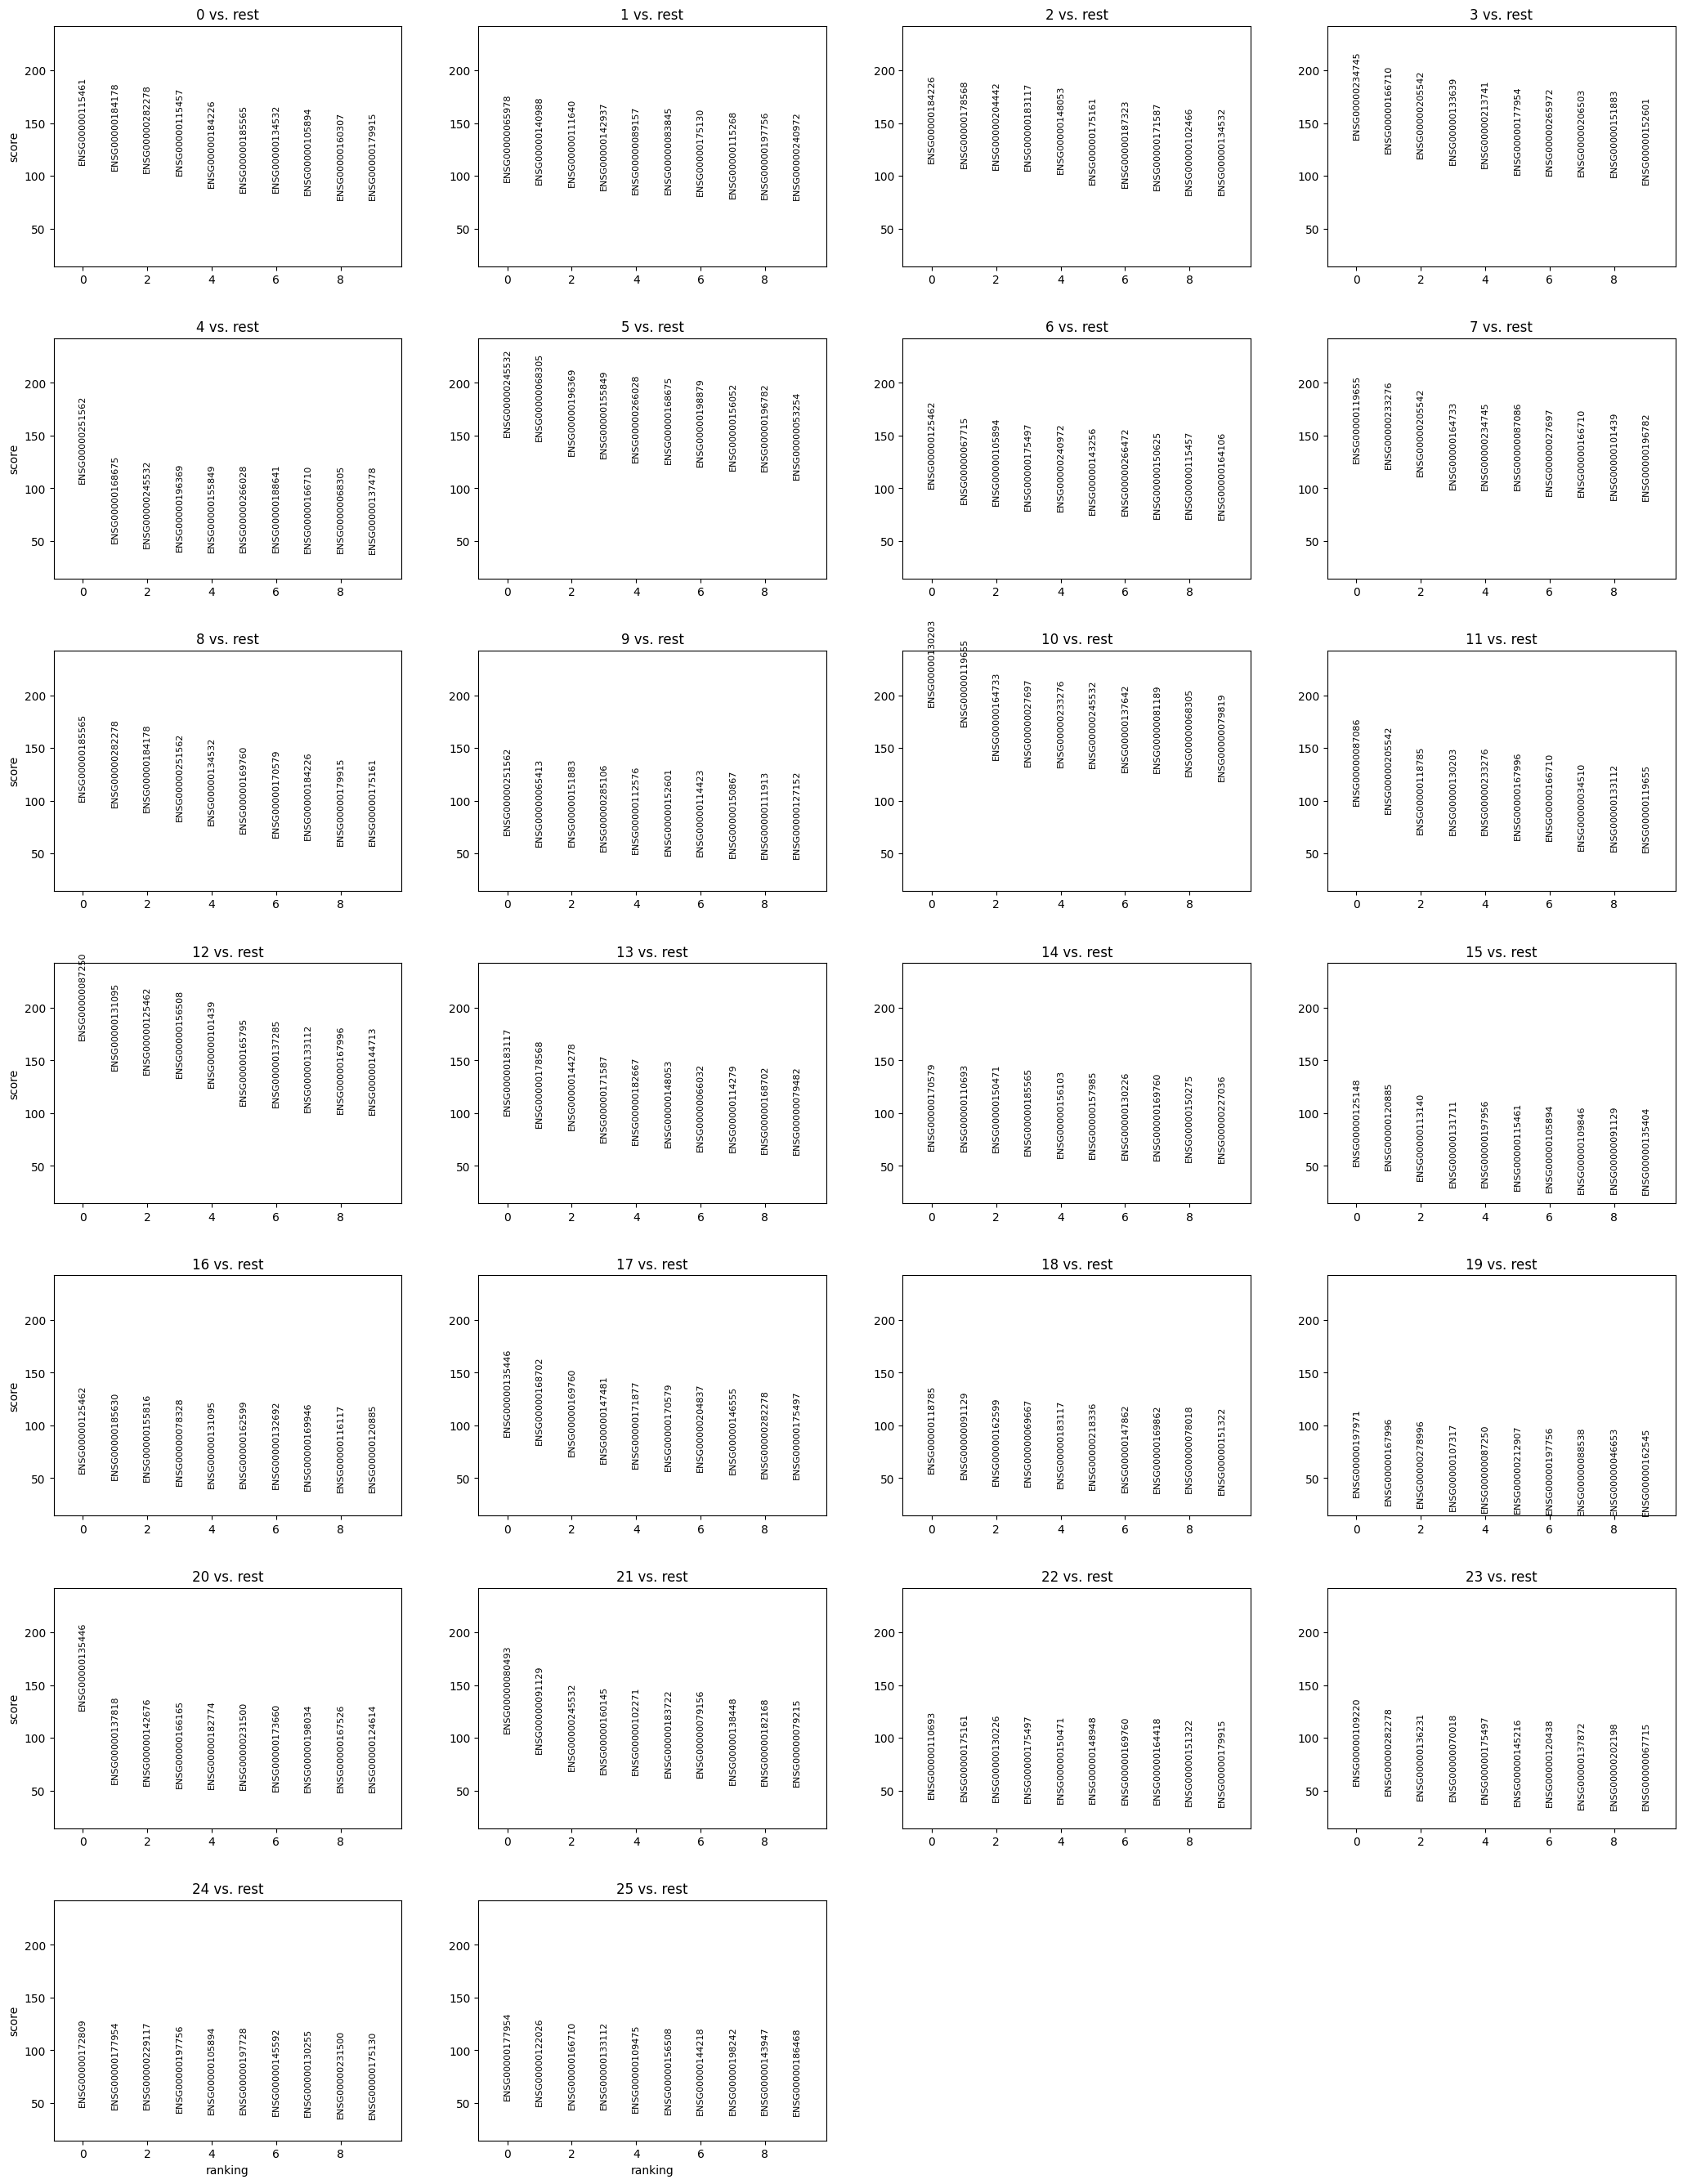

In [ ]:
sc.pl.rank_genes_groups(adata, n_genes=10)

categories: 0, 1, 2, etc.
var_group_labels: 6


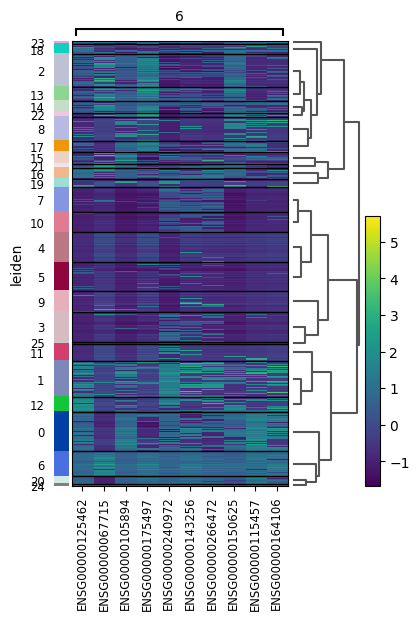

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata, groups="6", n_genes=10, groupby="leiden")

In [ ]:
# Obtain the top features for each cluster
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
top_features = {}
n_top_genes = 10  # desired number of top genes per cluster
for group in groups:
    top_features[group] = result["names"][group][:n_top_genes]

# Print the top features for each cluster
for group, features in top_features.items():
    print(f"Cluster {group} top features:")
    for feature in features:
        print(feature)
    print()

Cluster 0 top features:
ENSG00000115461
ENSG00000184178
ENSG00000282278
ENSG00000115457
ENSG00000184226
ENSG00000185565
ENSG00000134532
ENSG00000105894
ENSG00000160307
ENSG00000179915

Cluster 1 top features:
ENSG00000065978
ENSG00000140988
ENSG00000111640
ENSG00000142937
ENSG00000089157
ENSG00000083845
ENSG00000175130
ENSG00000115268
ENSG00000197756
ENSG00000240972

Cluster 2 top features:
ENSG00000184226
ENSG00000178568
ENSG00000204442
ENSG00000183117
ENSG00000148053
ENSG00000175161
ENSG00000187323
ENSG00000171587
ENSG00000102466
ENSG00000134532

Cluster 3 top features:
ENSG00000234745
ENSG00000166710
ENSG00000205542
ENSG00000133639
ENSG00000213741
ENSG00000177954
ENSG00000265972
ENSG00000206503
ENSG00000151883
ENSG00000152601

Cluster 4 top features:
ENSG00000251562
ENSG00000168675
ENSG00000245532
ENSG00000196369
ENSG00000155849
ENSG00000266028
ENSG00000188641
ENSG00000166710
ENSG00000068305
ENSG00000137478

Cluster 5 top features:
ENSG00000245532
ENSG00000068305
ENSG00000196369
ENS

In [ ]:
# Access the marker genes results from rank_genes_groups
marker_genes = adata.uns['rank_genes_groups']

# Iterate over each group and print the marker genes
for group in marker_genes['names'].dtype.names:
    print(f"Group: {group}")
    print(marker_genes['names'][group][:10])  # Print the top 10 marker genes
    print("\n")

Group: 0
['ENSG00000115461' 'ENSG00000184178' 'ENSG00000282278' 'ENSG00000115457'
 'ENSG00000184226' 'ENSG00000185565' 'ENSG00000134532' 'ENSG00000105894'
 'ENSG00000160307' 'ENSG00000179915']


Group: 1
['ENSG00000065978' 'ENSG00000140988' 'ENSG00000111640' 'ENSG00000142937'
 'ENSG00000089157' 'ENSG00000083845' 'ENSG00000175130' 'ENSG00000115268'
 'ENSG00000197756' 'ENSG00000240972']


Group: 2
['ENSG00000184226' 'ENSG00000178568' 'ENSG00000204442' 'ENSG00000183117'
 'ENSG00000148053' 'ENSG00000175161' 'ENSG00000187323' 'ENSG00000171587'
 'ENSG00000102466' 'ENSG00000134532']


Group: 3
['ENSG00000234745' 'ENSG00000166710' 'ENSG00000205542' 'ENSG00000133639'
 'ENSG00000213741' 'ENSG00000177954' 'ENSG00000265972' 'ENSG00000206503'
 'ENSG00000151883' 'ENSG00000152601']


Group: 4
['ENSG00000251562' 'ENSG00000168675' 'ENSG00000245532' 'ENSG00000196369'
 'ENSG00000155849' 'ENSG00000266028' 'ENSG00000188641' 'ENSG00000166710'
 'ENSG00000068305' 'ENSG00000137478']


Group: 5
['ENSG0000024553

In [ ]:
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("/content/drive/MyDrive/Transcriptomics/SCPC/scanpy_integrated_hgg_jan29.csv")

In [ ]:
!pip install openpyxl

In [ ]:
!python /content/drive/MyDrive/Transcriptomics/SCSA/SCSA.py -d /content/drive/MyDrive/Transcriptomics/SCSA/whole_v2.db -i /content/drive/MyDrive/Transcriptomics/SCPC/scanpy_integrated_hgg_jan29.csv -s scanpy -g Human -f1.5 -p 0.01 -o /content/drive/MyDrive/Transcriptomics/SCPC/hgg_results_jan29.txt -m txt

Version V1.1 [2020/07/03]
DB load: 47347 3 3 91969 37440
Namespace(input='/content/drive/MyDrive/Transcriptomics/SCPC/scanpy_integrated_hgg_jan29.csv', output='/content/drive/MyDrive/Transcriptomics/SCPC/hgg_results_jan29.txt', db='/content/drive/MyDrive/Transcriptomics/SCSA/whole_v2.db', source='scanpy', cluster='all', MarkerDB=None, foldchange=1.5, pvalue=0.01, weight=100.0, species='Human', tissue='All', outfmt='txt', celltype='normal', target='cellmarker', Gensymbol=False, norefdb=False, noprint=False, list_tissue=False)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 91969 37440
load markers: 77000
############################## Cluster 0 ##############################

!WARNING3:Zero marker sets found, type:marker
!WARNING3:Change the threshold or tissue name and try again?
!WARNING3:EnsemblID or GeneID,try '-E' command?
Cluster 0 Gene number: 0
None
!WARNING(go processing):Zero gene sets found for the cluster 0
!WARNING(go processing):Change the threshold and try again?
Other Gene 

In [ ]:
# Read the text document into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Transcriptomics/SCPC/hgg_results_nov30.txt', sep='\t')

In [ ]:
df

,Cell Type,Z-score,Cluster
0,Microglial cell,9.355286,0
1,Natural killer T (NKT) cell,5.666314,0
2,Astrocyte,4.708920,0
3,Monocyte,4.649406,0
4,Macrophage,3.091426,0
...,...,...,...
3578,Pericyte,-0.408681,9
3579,Myelinating schwann cell,-0.408681,9
3580,Mature oligodendrocyte,-0.408681,9
3581,Regulatory T (Treg) cell,-0.409501,9


In [ ]:
df['Z-score'] = df['Z-score'].fillna(0)

# Group the data by "Cluster" and find the cell type with the highest Z-score in each group
highest_zscores = df.groupby('Cluster')['Z-score'].idxmax()

# Extract the corresponding cell types for the highest Z-scores
cell_types_with_highest_zscores = df.loc[highest_zscores, 'Cell Type'].tolist()

In [ ]:
cell_types_with_highest_zscores

['Microglial cell',
 'Natural killer T (NKT) cell',
 'Astrocyte',
 'Neuron',
 'Microglial cell',
 'Natural killer T (NKT) cell',
 'Natural killer cell',
 'Microglial cell',
 'Natural killer T (NKT) cell',
 'Natural killer T (NKT) cell',
 'Neuron',
 'Microglial cell',
 'Astrocyte',
 'Neuron',
 'Neuron',
 'Astrocyte',
 'Astrocyte',
 'Oligodendrocyte',
 'Astrocyte',
 'Astrocyte',
 'Neuron',
 'Natural killer T (NKT) cell',
 'Astrocyte',
 'Natural killer T (NKT) cell',
 'Natural killer T (NKT) cell']

In [ ]:
cluster_to_cell_type = {cluster_num: cell_type for cluster_num, cell_type in enumerate(cell_types_with_highest_zscores)}
cluster_to_cell_type

{0: 'Microglial cell',
 1: 'Natural killer T (NKT) cell',
 2: 'Astrocyte',
 3: 'Neuron',
 4: 'Microglial cell',
 5: 'Natural killer T (NKT) cell',
 6: 'Natural killer cell',
 7: 'Microglial cell',
 8: 'Natural killer T (NKT) cell',
 9: 'Natural killer T (NKT) cell',
 10: 'Neuron',
 11: 'Microglial cell',
 12: 'Astrocyte',
 13: 'Neuron',
 14: 'Neuron',
 15: 'Astrocyte',
 16: 'Astrocyte',
 17: 'Oligodendrocyte',
 18: 'Astrocyte',
 19: 'Astrocyte',
 20: 'Neuron',
 21: 'Natural killer T (NKT) cell',
 22: 'Astrocyte',
 23: 'Natural killer T (NKT) cell',
 24: 'Natural killer T (NKT) cell'}

In [ ]:
adata.obs['leiden']

AGACACTAGTCCCAAT    0
CAATACGTCATTCCTA    0
AAGTTCGGTATTGGCT    0
TCACTATTCGCTGACG    0
ACCACAACAGGCGAAT    0
                   ..
GTGAGTTTCACTTTGT    6
GATCACAAGAAGTCAT    6
TAATTCCGTTCTCTCG    6
CGAAGGAAGTAGAGTT    6
CGATGCGTCATAGACC    6
Name: leiden, Length: 26155, dtype: category
Categories (25, object): ['0', '1', '2', '3', ..., '21', '22', '23', '24']

In [ ]:
adata.obs['leiden'] = adata.obs['leiden'].astype(int)

In [ ]:
adata.obs['cell_types'] = adata.obs['leiden'].map(cluster_to_cell_type)

In [ ]:
adata.obs

,n_genes_by_counts,total_counts,leiden,cell_types
AGACACTAGTCCCAAT,2964,2314.757812,0,Microglial cell
CAATACGTCATTCCTA,3058,2432.147705,0,Microglial cell
AAGTTCGGTATTGGCT,3076,2418.527588,0,Microglial cell
TCACTATTCGCTGACG,2861,2196.810059,0,Microglial cell
ACCACAACAGGCGAAT,2989,2334.194824,0,Microglial cell
...,...,...,...,...
GTGAGTTTCACTTTGT,645,1412.062744,6,Natural killer cell
GATCACAAGAAGTCAT,625,1345.573120,6,Natural killer cell
TAATTCCGTTCTCTCG,525,1236.489868,6,Natural killer cell
CGAAGGAAGTAGAGTT,576,1295.337769,6,Natural killer cell


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


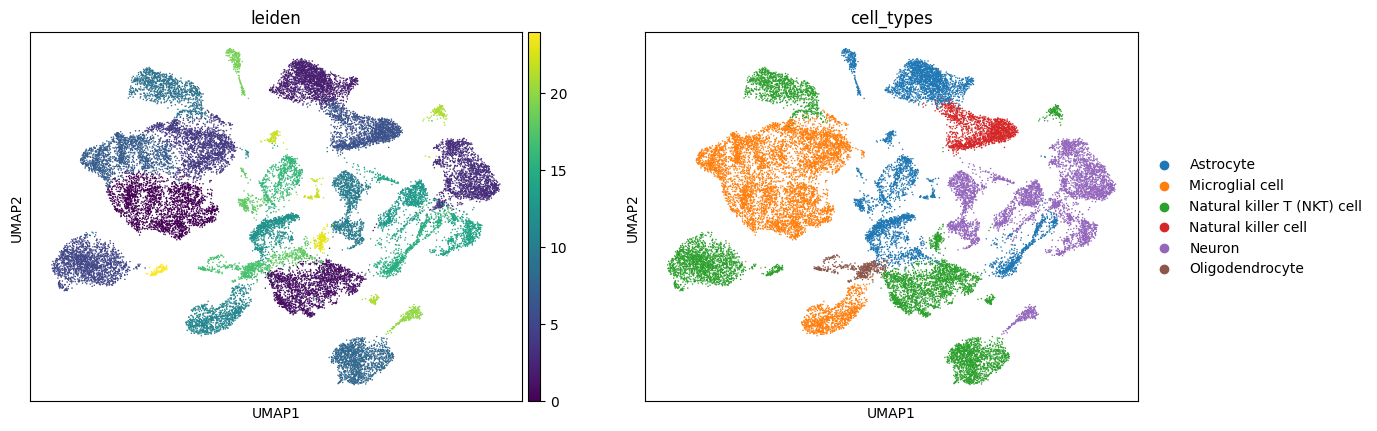

In [ ]:
sc.pl.umap(adata, color=['leiden', 'cell_types'])

In [ ]:
from matplotlib.pyplot import rc_context

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


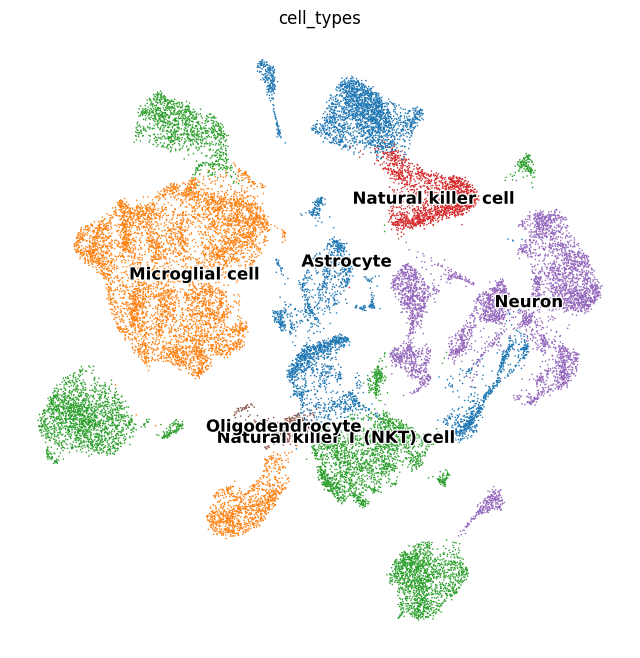

In [ ]:
with rc_context({'figure.figsize': (8,8)}):
    sc.pl.umap(adata, color = ['cell_types'], frameon = False, s = 5, legend_loc = 'on data',
              legend_fontsize=12, legend_fontoutline=2)